In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading the dataset
df=pd.read_csv(r"D:\twitter datasets\Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
# checking for null values in dataset
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [5]:
#EDA
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB
None


,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
pip install wordcloud

In [7]:
# removing characters and extra space from the tweets
char=["!","#","$","%","^","&","*","(",")","_","-","+","/","?",".",",",";","~","|","0","1","2","3","4","5","6","7","8",
     "9",'"',"'","“"]
for i in char:
    df["clean_text"]=df["clean_text"].str.replace(i,"").str.replace("RT","")
df['clean_text'] = df['clean_text'].str.replace(r'@\w+:', '', regex=True)
df['clean_text'] = df['clean_text'].str.replace(r'@\w+ ', ' ', regex=True)
df["clean_text"]=df["clean_text"].str.strip()
df["clean_text"]

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these  crores paid neerav modi not recover...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object

In [8]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [9]:
df

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these crores paid neerav modi not recover...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [10]:
category_counts=df["category"].value_counts()
category_counts

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

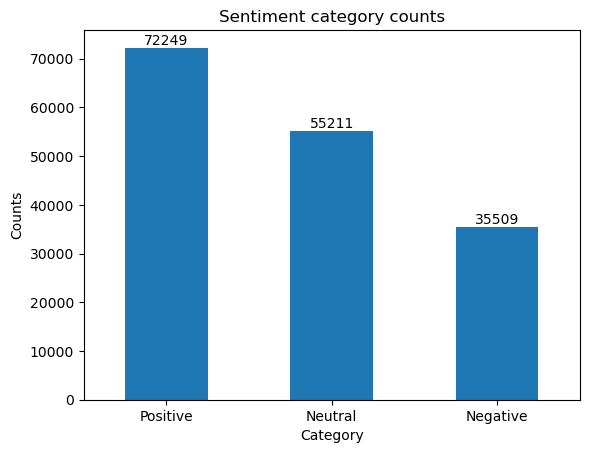

In [11]:
category_counts.plot(kind="bar")
plt.title("Sentiment category counts")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks([0,1,2],['Positive',"Neutral","Negative"],rotation=0)
plt.bar_label(plt.gca().containers[0],label_type="edge")
plt.show()

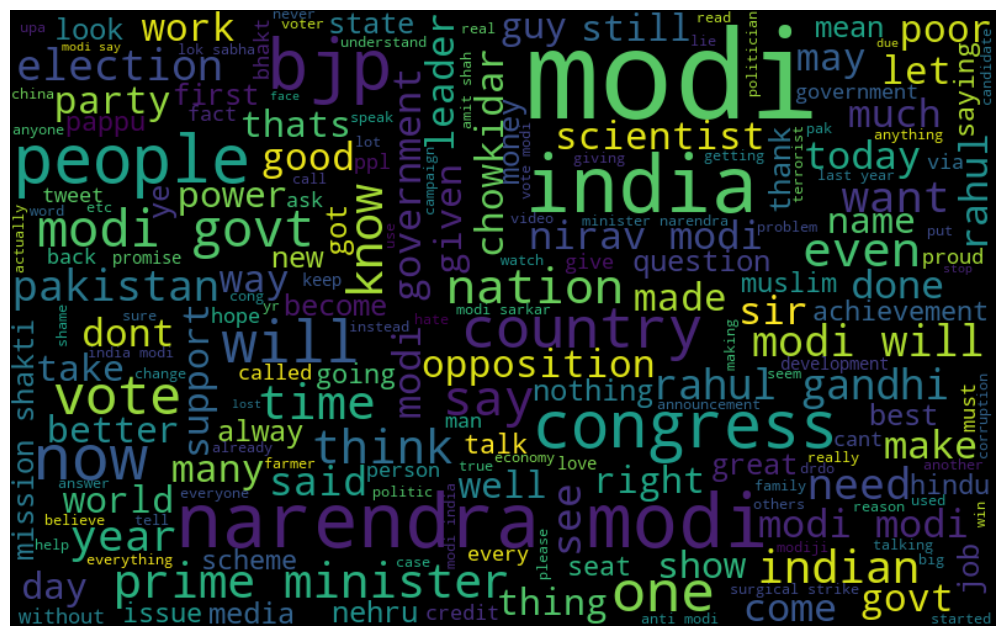

In [12]:
import matplotlib.pyplot as plt
#visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

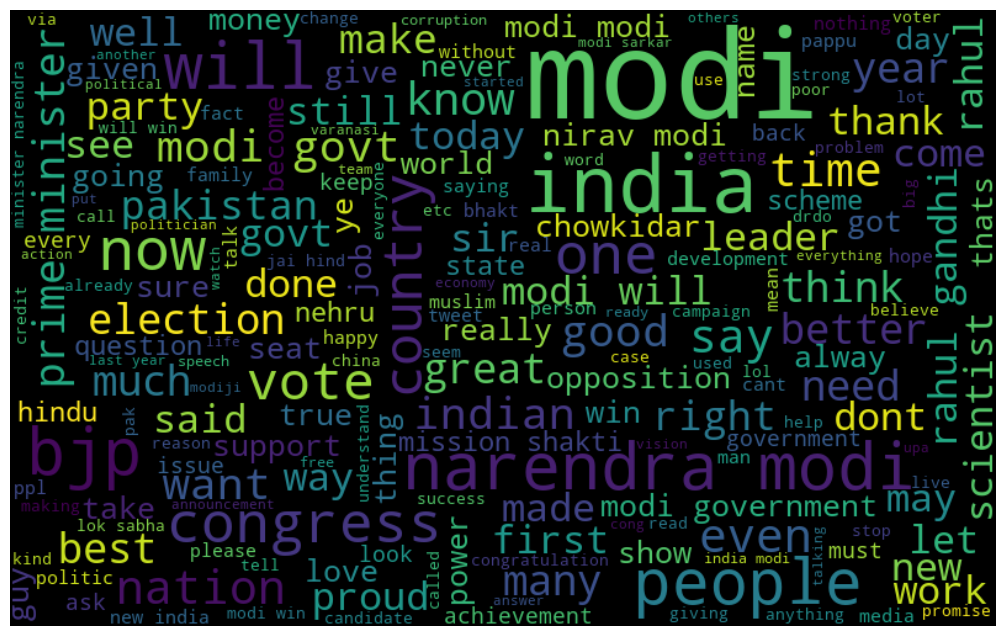

In [13]:
#frequent words visualization for +ve
all_words=" ".join([sentence for sentence in df['clean_text'][df['category']==1]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

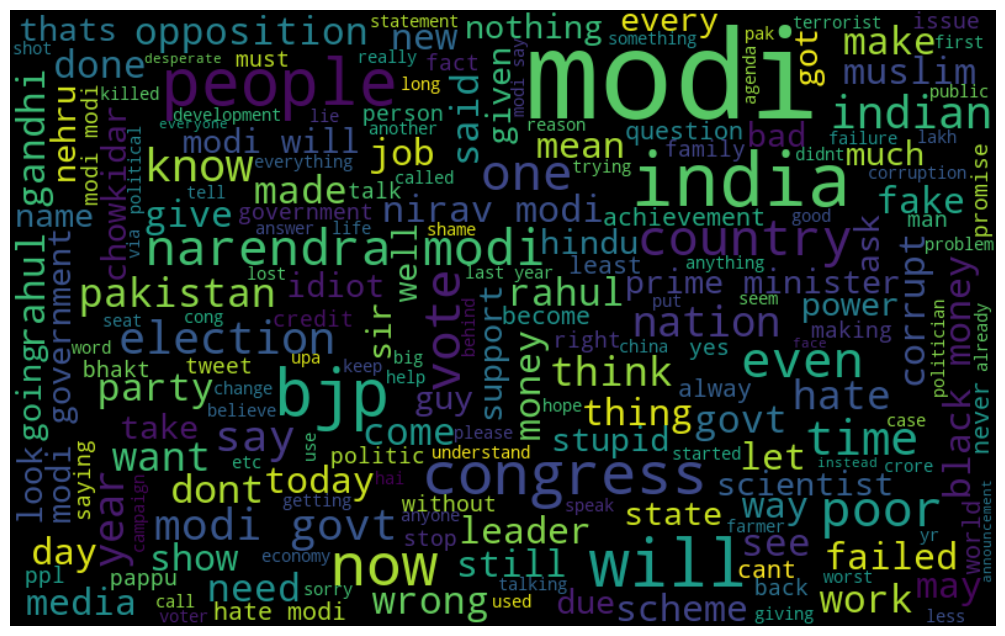

In [14]:
#frequent words visualization for -ve
all_words=" ".join([sentence for sentence in df['clean_text'][df['category']==-1]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
X = df['clean_text'] 
y = df['category']  

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

In [19]:
df1=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler

In [21]:
df2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lg', LogisticRegression(solver='lbfgs', max_iter=1000))  # Increase max_iter
])

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC  # Using LinearSVC for better handling large datasets
from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [23]:
df3=Pipeline([
    ('vectorizer',CountVectorizer(max_features=10000)), # Limit the number of features
    ('svc', LinearSVC())  # Use LinearSVC for large datasets
])

In [24]:
df4=Pipeline([
    ('vectorizer',CountVectorizer(max_features=10000)),
    ('dc', DecisionTreeClassifier())  
])

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
classifiers={"naive bayes mn":df1,
             "Log regress":df2, 
            "SVM":df3,
            "decision tree":df4}

Confusion Matrix for naive bayes mn: 
 [[ 4477   292  2383]
 [  657  6785  3625]
 [  803   337 13235]]
Confusion Matrix display for naive bayes mn: 


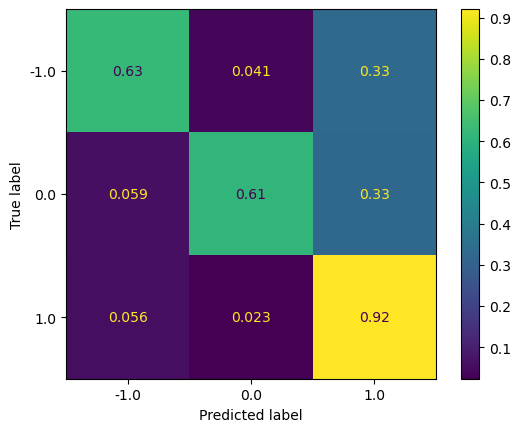

naive bayes mn Accuracy: 75.16 %
              precision    recall  f1-score   support

        -1.0       0.75      0.63      0.68      7152
         0.0       0.92      0.61      0.73     11067
         1.0       0.69      0.92      0.79     14375

    accuracy                           0.75     32594
   macro avg       0.79      0.72      0.74     32594
weighted avg       0.78      0.75      0.75     32594

 .........-------------------------------------------------------------....
Confusion Matrix for Log regress: 
 [[ 6313   277   562]
 [  112 10816   139]
 [  501   237 13637]]
Confusion Matrix display for Log regress: 


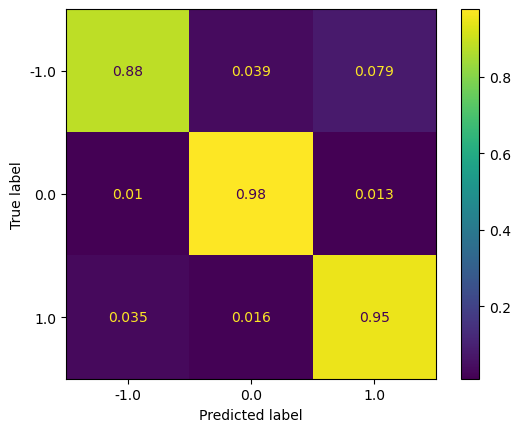

Log regress Accuracy: 94.39 %
              precision    recall  f1-score   support

        -1.0       0.91      0.88      0.90      7152
         0.0       0.95      0.98      0.97     11067
         1.0       0.95      0.95      0.95     14375

    accuracy                           0.94     32594
   macro avg       0.94      0.94      0.94     32594
weighted avg       0.94      0.94      0.94     32594

 .........-------------------------------------------------------------....


D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda navig\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix for SVM: 
 [[ 6451   151   550]
 [  143 10779   145]
 [  481   155 13739]]
Confusion Matrix display for SVM: 


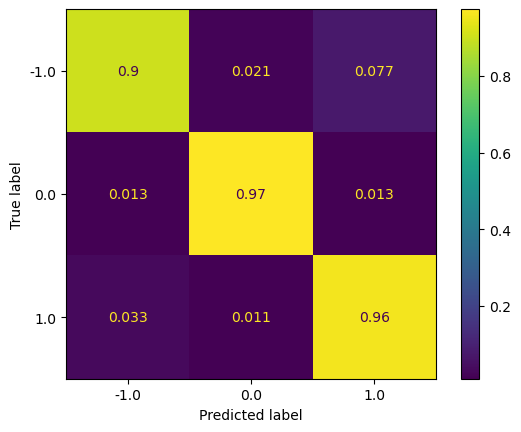

SVM Accuracy: 95.01 %
              precision    recall  f1-score   support

        -1.0       0.91      0.90      0.91      7152
         0.0       0.97      0.97      0.97     11067
         1.0       0.95      0.96      0.95     14375

    accuracy                           0.95     32594
   macro avg       0.95      0.94      0.94     32594
weighted avg       0.95      0.95      0.95     32594

 .........-------------------------------------------------------------....
Confusion Matrix for decision tree: 
 [[ 5559   234  1359]
 [  163 10675   229]
 [ 1188   310 12877]]
Confusion Matrix display for decision tree: 


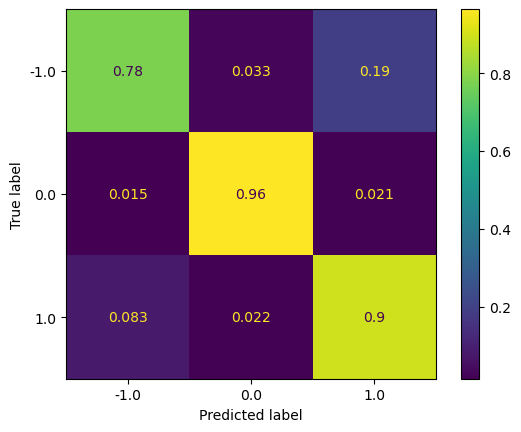

decision tree Accuracy: 89.31 %
              precision    recall  f1-score   support

        -1.0       0.80      0.78      0.79      7152
         0.0       0.95      0.96      0.96     11067
         1.0       0.89      0.90      0.89     14375

    accuracy                           0.89     32594
   macro avg       0.88      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594

 .........-------------------------------------------------------------....


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train) # train -> xtrain and ytrain
    y_pred=clf.predict(X_test) # predict -> xtest
    cm = confusion_matrix(y_test, y_pred) # confusion matrix -> ytest, ypred
    print(f"Confusion Matrix for {name}: \n", cm)
    cmdisplay=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
    print(f"Confusion Matrix display for {name}: \n", cmdisplay)
    plt.show()
    accuracy=accuracy_score(y_test, y_pred) # accuracy -> ytest, ypredict
    results [name] = accuracy
    print(f'{name} Accuracy: {accuracy *100:.2f} %')
    print(classification_report (y_test, y_pred)) # class reprt -> ytest, ypred
    print(' .........-------------------------------------------------------------....')

In [28]:
tweets=["fuck terrorist asians", #casteist abuse
       "you are kind human",
       "ofcourse you black monkeys need us people to feed yourself", #racist abuse
       "he is trying to rule world",
       "Women are dumb weakest creatures on earth they're meant to be a man's slave", #gender abuse
       "there is a abusive culture among today's generation",
       "BMW is #world's best car"]

In [29]:
#naive bayes
df1.predict(tweets)

array([-1.,  1., -1.,  1., -1.,  1.,  1.])

In [30]:
#logistic regression
df2.predict(tweets)

array([-1.,  1., -1.,  0., -1.,  0.,  1.])

In [31]:
#svm
df3.predict(tweets)

array([-1.,  1., -1.,  0., -1.,  0.,  1.])

In [32]:
#decision tree
df4.predict(tweets)

array([-1.,  1., -1.,  0., -1.,  0.,  1.])

# Result
1. SVM and LOGISTIC REGRESSION model gave higher accuracy scores and also these models were able to predict sample tweets correctly according to the sentment of the tweets.
2. Decision tree was also able to predict correctly 
3. Naive Bayes gave lowest accuracy of 75 and also the model was not able to predict NEUTRAL tweets correctly


In [33]:
#FINDING BEST CLASSIFIER
best_classifier=max(results,key=results.get)
print(f'BEST CLASSIFIER: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')

BEST CLASSIFIER: SVM with Accuracy: 0.9501


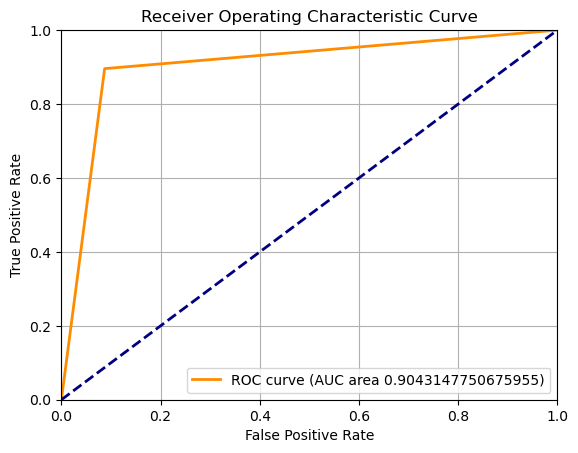

In [34]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

#Actual outcomes and predicted probabilities
y_test_binary = [0 if y == -1 else y for y in y_test]
y_pred_binary = [0 if y == -1 else y for y in y_pred]
#Calculate ROC curve

fpr, tpr, thresholds=roc_curve(y_test_binary, y_pred_binary)

#Calculate AUC

roc_auc=auc(fpr, tpr)

#Plot ROC curve

plt.figure()

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (AUC area {roc_auc})')
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic Curve') 
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [35]:
# Optimizing svm 

# Since the dataset is very large decision tree optimization is taking too much time to run

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC

In [37]:
df3=Pipeline([
    ('vectorizer',CountVectorizer(max_features=10000)), # Limit the number of features
    ('svc', LinearSVC())  # Use LinearSVC for large datasets
])

In [38]:
# Define hyperparameter tuning space
svm_param_grid = {
    'vectorizer__max_features': [5000, 10000, 20000],  # Tune vectorizer max_features
    'svc__C': [0.1, 1, 10],  # Tune LinearSVC regularization parameter
    'svc__penalty': ['l1', 'l2'],  # Tune LinearSVC penalty type
}

In [39]:
# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(df3, svm_param_grid, cv=5, scoring='f1_macro')

In [40]:
# Perform grid search
svm_grid_search.fit(X_train, y_train)

D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda navig\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The defau

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(max_features=10000)),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2'],
                         'vectorizer__max_features': [5000, 10000, 20000]},
             scoring='f1_macro')

In [41]:
# Get the best combination of hyperparameters
svm_best_params = svm_grid_search.best_params_

# Get the best average score across all cross-validation folds
svm_best_score = svm_grid_search.best_score_

# Get the best model (pipeline instance with optimal hyperparameters)
svm_best_model = svm_grid_search.best_estimator_

# Use the best model to make predictions on new data
svm_y_pred = svm_best_model.predict(X_test)

In [42]:
print("best model:",svm_best_model)
print("score:",svm_best_score)

best model: Pipeline(steps=[('vectorizer', CountVectorizer(max_features=20000)),
                ('svc', LinearSVC(C=0.1))])
score: 0.9412134883916604


In [43]:
svm_best_model.predict(tweets)

array([-1.,  1., -1.,  0., -1.,  0.,  1.])

In [44]:
print(classification_report (y_test, svm_y_pred))

              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.91      7152
         0.0       0.96      0.98      0.97     11067
         1.0       0.95      0.96      0.95     14375

    accuracy                           0.95     32594
   macro avg       0.95      0.94      0.94     32594
weighted avg       0.95      0.95      0.95     32594



In [45]:
#--------------------OPTIMIZING DECISION TREE-----------------------------------------------

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [47]:
dt_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [48]:
# Define the hyperparameter grid
dt_param_grid = {
    'vectorizer__max_features': [5000, 10000, 15000],
    'dt__max_depth': [None, 3, 4, 5, 6, 7],
    'dt__min_samples_split': [2, 5, 7],
    'dt__criterion': ['gini', 'entropy'],
    'dt__min_samples_leaf': [1, 2, 4]
}

In [49]:
# Perform grid search
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='f1_macro', verbose=1)

In [ ]:
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# Get the best parameters and the best model
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

In [ ]:
# Predict on the test set
y_pred = dt_best_model.predict(X_test)

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(conf_matrix)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the best model
dt_best_model = dt_grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(58, 20))
plot_tree(dt_best_model.named_steps['dt'], 
          feature_names=X_train.columns, 
          filled=True, 
          class_names=['Negative', 'Neutral', 'Positive'])
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# -----------------LOGISTIC REGRESSION OPTIMIZATION--------------------